In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import imageio
import glob

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

T SNE



In [4]:
pwd

'/Users/Kelly/galvanize/week8/notebooks'

In [5]:
df = pd.read_csv('../data/styles.csv', error_bad_lines=False)

In [6]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [15]:
# all_img = []
# for i, ix in enumerate( df.id ):
#     if i%1000==0:
#         print(i, len(df))
    
#     fn = r'/Users/Kelly/galvanize/week8/data/images/{}.jpg'.format(ix)
#     try:
#         img = imageio.imread(fn)
#         if img.shape!=(80, 60, 3):
#             all_img.append( [0]*(60*80*3) )
#         else:
#             all_img.append( img.ravel() )
#     except FileNotFoundError:
#         all_img.append( [0]*(60*80*3) )

0 44446
1000 44446
2000 44446
3000 44446
4000 44446
5000 44446
6000 44446
7000 44446
8000 44446
9000 44446
10000 44446
11000 44446
12000 44446
13000 44446
14000 44446
15000 44446
16000 44446
17000 44446
18000 44446
19000 44446
20000 44446
21000 44446
22000 44446
23000 44446
24000 44446
25000 44446
26000 44446
27000 44446
28000 44446
29000 44446
30000 44446
31000 44446
32000 44446
33000 44446
34000 44446
35000 44446
36000 44446
37000 44446
38000 44446
39000 44446
40000 44446
41000 44446
42000 44446
43000 44446
44000 44446


In [16]:
#all_img = np.stack(all_img)

In [12]:
loaded = np.load('../image_array.npz')

In [13]:
all_img = loaded['a']

In [14]:
bw_img = loaded['b']

In [9]:
# don't need to run this if you have saved copy of bw_array.npy
#bw_img = all_img.reshape(-1, 80, 60, 3).mean(3).reshape(-1, 80*60)

In [10]:
#np.save('bw_array', bw_img)

In [15]:
all_img.shape

(44446, 14400)

In [16]:
df.shape

(44446, 10)

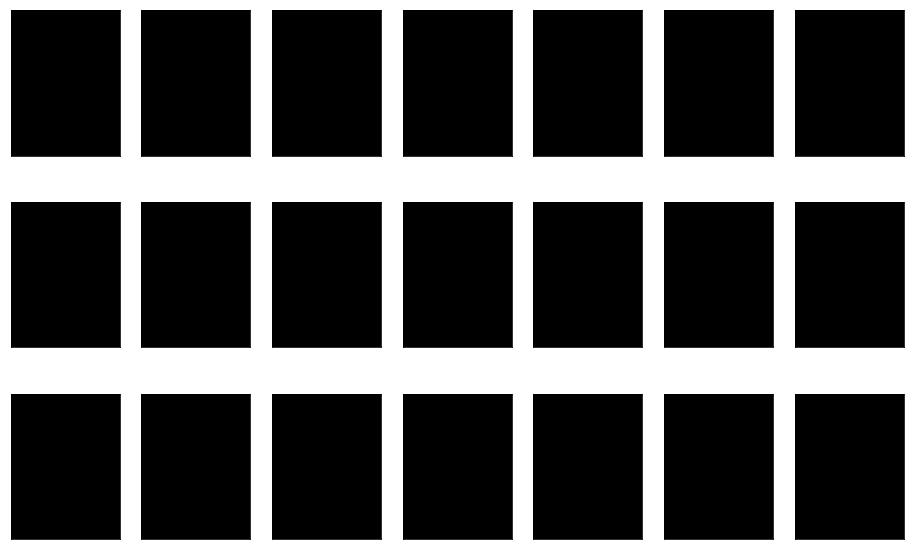

In [17]:
fig, axs = plt.subplots(3,7, figsize=(16,10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow( all_img[i].reshape(80,60,3)/255 )
    ax.set_xticks([])
    ax.set_yticks([])

In [1]:
df['masterCategory'].value_counts().index

NameError: name 'df' is not defined

In [66]:
df['gender'].value_counts()

Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: gender, dtype: int64

In [40]:
apparel_subcats = df[df['masterCategory']=='Apparel'].groupby('subCategory').count()['masterCategory']
print(apparel_subcats, '\n')
print(apparel_subcats.index, '\n')
print(apparel_subcats.values)

subCategory
Apparel Set                   106
Bottomwear                   2694
Dress                         478
Innerwear                    1808
Loungewear and Nightwear      470
Saree                         427
Socks                          12
Topwear                     15405
Name: masterCategory, dtype: int64 

Index(['Apparel Set', 'Bottomwear', 'Dress', 'Innerwear',
       'Loungewear and Nightwear', 'Saree', 'Socks', 'Topwear'],
      dtype='object', name='subCategory') 

[  106  2694   478  1808   470   427    12 15405]


In [2]:
accessory_subcats = df[df['masterCategory']=='Accessories'].groupby('subCategory').count()['masterCategory']

NameError: name 'df' is not defined

In [174]:
df[df['masterCategory']=='Accessories'].groupby('subCategory').count()['masterCategory'].index

Index(['Accessories', 'Bags', 'Belts', 'Cufflinks', 'Eyewear', 'Gloves',
       'Headwear', 'Jewellery', 'Mufflers', 'Perfumes', 'Scarves',
       'Shoe Accessories', 'Socks', 'Sports Accessories', 'Stoles', 'Ties',
       'Umbrellas', 'Wallets', 'Watches', 'Water Bottle'],
      dtype='object', name='subCategory')

In [177]:
acc_sub_colors = {'Accessories':'orange', 'Bags':'#BA55D3', 'Belts':'purple', 'Cufflinks':'green', 'Eyewear':'#8B0000', 'Gloves':'orange',
       'Headwear':'cyan', 'Jewellery':'#008B8B', 'Mufflers':'orange', 'Perfumes':'orange', 'Scarves':'blue',
       'Shoe Accessories':'orange', 'Socks':'blue', 'Sports Accessories':'orange', 'Stoles':'orange', 'Ties':'blue',
       'Umbrellas':'orange', 'Wallets':'#F08080', 'Watches':'#808080', 'Water Bottle':'orange'}

In [173]:
df['subCategory'].value_counts().index

Index(['Topwear', 'Shoes', 'Bags', 'Bottomwear', 'Watches', 'Innerwear',
       'Jewellery', 'Eyewear', 'Fragrance', 'Sandal', 'Wallets', 'Flip Flops',
       'Belts', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear', 'Saree',
       'Nails', 'Makeup', 'Headwear', 'Ties', 'Accessories', 'Scarves',
       'Cufflinks', 'Apparel Set', 'Free Gifts', 'Stoles', 'Skin Care', 'Skin',
       'Eyes', 'Mufflers', 'Shoe Accessories', 'Sports Equipment', 'Gloves',
       'Hair', 'Bath and Body', 'Water Bottle', 'Umbrellas', 'Perfumes',
       'Wristbands', 'Beauty Accessories', 'Sports Accessories', 'Vouchers',
       'Home Furnishing'],
      dtype='object')

In [1]:
df[df['masterCategory']=='Footwear'].groupby('subCategory').count()

NameError: name 'df' is not defined

In [11]:
df[df['masterCategory']=='Apparel'].groupby(['subCategory','articleType']).count()['masterCategory']

subCategory               articleType       
Apparel Set               Clothing Set             8
                          Kurta Sets              94
                          Swimwear                 4
Bottomwear                Capris                 175
                          Churidar                30
                          Jeans                  609
                          Jeggings                34
                          Leggings               177
                          Patiala                 38
                          Rain Trousers            2
                          Salwar                  32
                          Salwar and Dupatta       7
                          Shorts                 545
                          Skirts                 128
                          Stockings               32
                          Swimwear                13
                          Tights                   9
                          Track Pants            304
 

In [71]:
wearable_list = ['Apparel', 'Accessories', 'Footwear']

In [79]:
wearable_df = df[ df['masterCategory'].isin(wearable_list) ]
wearable_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [170]:
wearable_img = all_img[ wearable_df.index.values ].copy()

In [179]:
wearable_df.index.values.shape 

(41911,)

In [1]:
plt.imshow( wearble_img[47].reshape(80,60,3)/255 )

NameError: name 'plt' is not defined

In [115]:
bw_wearables = wearble_img.reshape(-1, 80, 60, 3).mean(3).reshape(-1, 80*60)

In [120]:
from sklearn.decomposition import PCA

In [143]:
pca = PCA(n_components=2)
bw_wearables_pca = pca.fit_transform(bw_wearables[0:10000])

In [144]:
wearables_pca = pca.fit_transform(wearable_img[0:10000])

In [171]:
wearables_pca.shape

(10000, 2)

In [148]:
masterCat_colors = {'Apparel':'orange','Accessories':'teal','Footwear':'red', 'Personal Care':'grey', 'Free Items':'yellow', 'Sporting Goods':'black', 'Home':'magenta'}
wearable_df['colors'] = wearable_df['masterCategory'].apply(lambda x: masterCat_colors[x])

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


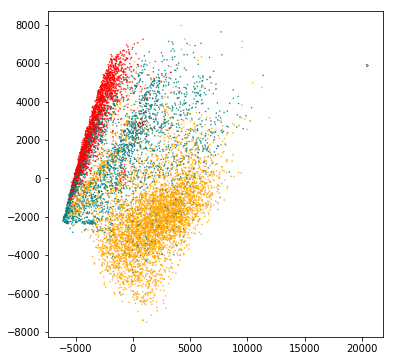

In [164]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter( *wearables_pca.T, s=.25 , color=wearable_df['colors'][0:10000])

In [195]:
image_matrix_row_labels = idx_series.str.split(".").map(lambda x:x[0]).astype(int)

In [196]:
image_matrix_row_labels

0         9733
1        14147
2        52112
3         6400
4        34297
5        24084
6        12536
7        54563
8        15259
9        35189
10       44770
11        4217
12       47279
13       36480
14       16750
15       50705
16       26693
17       37946
18        3578
19       40516
20       10321
21       16988
22       59047
23        2666
24       41608
25       46167
26        5109
27       46601
28       11981
29       20584
         ...  
44411    51364
44412    17331
44413     2119
44414    10338
44415    27594
44416    16991
44417    39972
44418    41611
44419    26852
44420     5110
44421    37787
44422    18764
44423    51402
44424    17457
44425    36499
44426    47260
44427    48153
44428    16749
44429    57073
44430    11026
44431     3561
44432    58340
44433    43006
44434    25383
44435    53215
44436    15240
44437     8434
44438    44769
44439     7707
44440     6419
Length: 44441, dtype: int64

In [ ]:
Apparel
Accessories
Footwear
Personal Care
Free Items
Sporting Goods
Home

In [ ]:
{'dark cyan':'#008B8B', 'grey':'#808080', "medium_turquoise":'#BA55D3', 'coral':'#F08080', 'dark red':'#8B0000', 'dark orange':'#FF8C00', 'light orange':'#F4A460'}

SyntaxError: invalid syntax (<ipython-input-15-2de62df7843d>, line 1)